Lecture50 Mar/18/2020

# 산술연산

- 행/열 인덱스를 기준으로 모든 원소 정렬
- 동일 위치 원소끼리 1:1 대응
- 1:1 대응 원소끼리 연산 처리

In [0]:
import pandas as pd
import numpy as np


In [2]:
st1 = pd.Series({'국어' : 100, '영어': 80, '수학' : 90})
st2 = pd.Series({'수학' : 80, '국어' : 90, '영어': 80, })

# print (st1.sort_index(), '\n')
# print (st2.sort_index(), '\n')

print (st1.sort_index() - st2.sort_index(), '\n')
print (st1.sort_index() + st2.sort_index(), '\n')
print (st1.sort_index() * st2.sort_index(), '\n')
print (round(st1.sort_index() / st2.sort_index(), 2), '\n')

data = pd.DataFrame([(st1.sort_index() + st2.sort_index()),st1.sort_index() - st2.sort_index(),st1.sort_index() * st2.sort_index(),round(st1.sort_index() / st2.sort_index(), 2)], index = ['합', '차', '곱', '분'])
# data = pd.concat([st1.sort_index() + st2.sort_index(),st1.sort_index() - st2.sort_index(),st1.sort_index() * st2.sort_index(),st1.sort_index() / st2.sort_index()], axis=1)
print (data)

국어    10
수학    10
영어     0
dtype: int64 

국어    190
수학    170
영어    160
dtype: int64 

국어    9000
수학    7200
영어    6400
dtype: int64 

국어    1.11
수학    1.12
영어    1.00
dtype: float64 

        국어       수학      영어
합   190.00   170.00   160.0
차    10.00    10.00     0.0
곱  9000.00  7200.00  6400.0
분     1.11     1.12     1.0


In [3]:
st1 = pd.Series({'국어' : np.nan, '영어' : 80, '수학' : 90, })
st2 = pd.Series({'수학' : 80, '국어' : 90, })

data = pd.DataFrame([(st1.sort_index() + st2.sort_index()),st1.sort_index() - st2.sort_index(),st1.sort_index() * st2.sort_index(),round(st1.sort_index() / st2.sort_index(), 2)], index = ['합', '차', '곱', '분'])
print (data)

   국어       수학  영어
합 NaN   170.00 NaN
차 NaN    10.00 NaN
곱 NaN  7200.00 NaN
분 NaN     1.12 NaN


In [4]:
st1 = pd.Series({'국어' : np.nan, '영어' : 80, '수학' : 90, })
st2 = pd.Series({'수학' : 80, '국어' : 90, })

sr_add = st1.add(st2, fill_value=0)
sr_sub = st1.sub(st2, fill_value=0)
sr_mul = st1.mul(st2, fill_value=0)
sr_div = st1.div(st2, fill_value=0)

data = pd.DataFrame([sr_add, sr_sub, sr_mul, sr_div], index=['합', '차','곱','분'])
print (data)

     국어        수학    영어
합  90.0   170.000  80.0
차 -90.0    10.000  80.0
곱   0.0  7200.000   0.0
분   0.0     1.125   inf


# `to_csv / read_csv` : CSV 파일 읽고 저장

- 

In [7]:
with open ('sample.csv', 'w') as f :
    f.write('3')
file_path = 'sample.csv'
df1 = pd.read_csv(file_path)
print (df1, '\n', type(df1))

Empty DataFrame
Columns: [3]
Index: [] 
 <class 'pandas.core.frame.DataFrame'>


In [8]:
df2 = pd.read_csv(file_path, header=None)
print (df2, '\n', type(df2))

   0
0  3 
 <class 'pandas.core.frame.DataFrame'>


In [9]:
df3 = pd.read_csv(file_path, index_col=None)
print (df3, '\n', type(df3))

Empty DataFrame
Columns: [3]
Index: [] 
 <class 'pandas.core.frame.DataFrame'>


In [0]:
df4 = pd.read_csv(file_path, index_col='c0')
print (df4, '\n', type(df4))

In [0]:
df4.to_csv('df5.csv')
df5 = pd.read_csv('df5.csv')
print (df5)

# `to_json / read_json` : json 파일 I/O

In [0]:
df4.to_json('df_j.json')
df_j = pd.read_json('df_j.json')
print (df_j)

# `to_pickle / read_pickle`  : binary file

In [0]:
df5.to_pickle('df6.pkl')
df6 = pd.read_pickle('df6.pkl')
print (df6)

## pandas의 `to/read_pickle`과 python 외장 라이브러리 `pickle` 비교

In [0]:
import pickle
with open ('test.txt', 'wb') as fw :
    data = { 1: 'python', 2: 'you need'}
    pickle.dump(data, fw)
with open ('test.txt', 'rb') as fr : 
    data = pickle.load(fr)
    print (data)

In [0]:
import os
os.getcwd()

# 예제] Titanic: Machine Learning from Disaster (from kaggle)

### Titanic data 전처리

- 분석 데이터 : train.csv
- 재사용 가능한 전처리 사용자 함수 작성하여 일괄 전처리 null 값 처리 ; Age는 평균나이, 나머지 칼럼은'N'값으로 변경, cabin 칼럼은 선실 번호 중 선실 등급 나타내는 첫번째 알파벳이 중요, 앞문자만 추출, 문자열 칼럼 레이블 인코딩 불필요한 속성 칼럼 삭제 (Passengerid, Name,  Ticket)
- 탐색적 분석 필수 항목 :  groupby() 또는 sns.barplot() 사용하여 성별 생존자, 객실 등급별 성별 생존자, 연령별 생존자 등
- 훈련데이터(train.csv) : 검증데이터 (test.csv) = 8:2
- 분류모델 : Decision Tree, Random Forest, Logistic Regression 3개 모두 적용
- 평가 : scikitlearn metrics 사용, 다음 항목들을 포함하는 사용자 함수 def get_cif_eval(y_test, pred) 작성하여 일괄 처리, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
- 모델 개발 및 평가 결과에 대한 종합 의견

### Data Dictionary

- survival :	Survival /	0 = No, 1 = Yes
- pclass :	Ticket class / 1 = 1st, 2 = 2nd, 3 = 3rd
- sex :	Sex	
- Age :	Age in years	
- sibsp :	# of siblings / spouses aboard the Titanic	
- parch :	# of parents / children aboard the Titanic	
- ticket :	Ticket number	
- fare :	Passenger fare	
- cabin :	Cabin number	
- embarked :	Port of Embarkation /	C = Cherbourg, Q = Queenstown, S = Southampton



In [79]:
train = pd.read_csv('train.csv')
# train.to_csv('titanic.csv')
# print (train.head())
print (train.shape)
print (train.describe())
print (train.describe(include='all'))
print (train.columns)
print (train.keys())
print (train.info())

(891, 12)
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
        PassengerId    Survived      Pclass  ...        Fare    Cabin  Embarked
count    891.000000  891.000000  891.000000  ...  891.000000      204       889
unique          NaN         NaN         NaN  ...    

## 전처리 내역

 - train data checking : null처리할 것들 확인 (age, cabin, embarked 등 NaN data)
 - Cabin 속성값 정리 : 선실 번호 중 선실 등급 나타내는 첫번째 알파벳만 추출
 - 불필요한 칼럼 삭제 : passengerid, name, ticket
 - 문자열 데이터 인코딩 : sex, cabin, embarked
 - 범주형 취급 : plcass, survived

## `value_counts()`

In [20]:
print (train.Age.value_counts(), '\n')
print (train.Pclass.value_counts(), '\n')
# print (train[['SibSp', 'Parch']].value_counts(), '\n')
# 다수 검색은 불가??

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 



AttributeError: ignored

## `isnull()` : Null 처리

In [13]:
print (train['Age'].isnull().sum())
# print (train.Age.isnull().sum())
train['Age'].fillna(train.Age.mean(), inplace=True)
print (train.Age.isnull().sum())

177
0


In [25]:
print (train.Embarked.isnull().sum())
train.Embarked.fillna('N', inplace=True)
print (train.Embarked.isnull().sum())

2
0


## `groupby` : 변수 간 상관관계 분석

In [26]:
print (train.groupby(['Sex', 'Survived'])['Survived'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [32]:
print (train.groupby(['Sex','Pclass','Survived'])['Survived'].count())

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64


# `Seaborn` : data 시각화

- 오차막대 error bar

AxesSubplot(0.125,0.125;0.775x0.755)


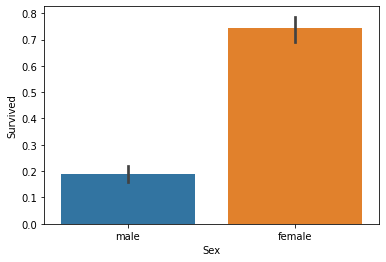

In [36]:
import seaborn as sns
print (sns.barplot(x = 'Sex', y = 'Survived', data = train))

AxesSubplot(0.125,0.125;0.775x0.755)


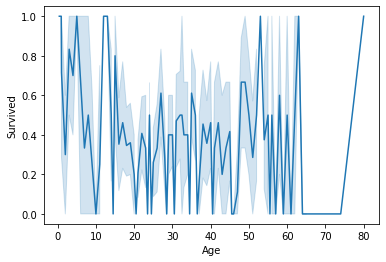

In [37]:
print (sns.lineplot(x = 'Age', y = 'Survived', data = train))

## 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별, 부자-빈자 간 생존 확률 : 객실 등급별, 성별에 따른 생존 확률

AxesSubplot(0.125,0.125;0.775x0.755)


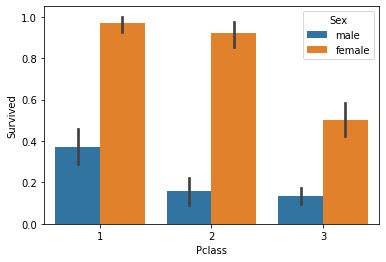

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
train.groupby(['Sex', 'Survived'])['Survived'].count()
print (sns.barplot(x='Pclass', y = 'Survived', hue = 'Sex', data=train))

## 오차막대 error bar 수정하기

seaborn은 barplot 함수 사용시 각 막대에 error bar가 함께 나타나도록 되어 있음, 막대 길이 길수록 분산이 더 큰 것, 신뢰 구간 95%

In [40]:
# Categorization 의 필요성
print (train.Age.value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


In [81]:
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'YoungAdult', 'Adult', 'Elderly']

train_age = pd.DataFrame(train.Age)
# print (train_age)

def ages (age) :
    if age > 65 : return group_names[-1]
    elif age > 35 : return group_names[-2]
    elif age > 19 : return group_names[-3]
    elif age > 15 : return group_names[-4]
    elif age > 10 : return group_names[-5]
    elif age > 4 : return group_names[2]
    elif age > 0 or age==0 : return group_names[1]
    else : return group_names[0]

# print (ages(32))

train_age_level = train_age['Age'].apply(lambda x: ages(x)).rename('AgeCate')
train_age = pd.concat([train_age, train_age_level ], axis=1)
print ((train_age), '\n')

print (train_age['AgeCate'].value_counts())

      Age     AgeCate
0    22.0  YoungAdult
1    38.0       Adult
2    26.0  YoungAdult
3    35.0  YoungAdult
4    35.0  YoungAdult
..    ...         ...
886  27.0  YoungAdult
887  19.0     Student
888   NaN     Unknown
889  26.0  YoungAdult
890  32.0  YoungAdult

[891 rows x 2 columns] 

YoungAdult    333
Adult         209
Unknown       177
Student        81
Baby           40
Child          24
Teenager       19
Elderly         8
Name: AgeCate, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


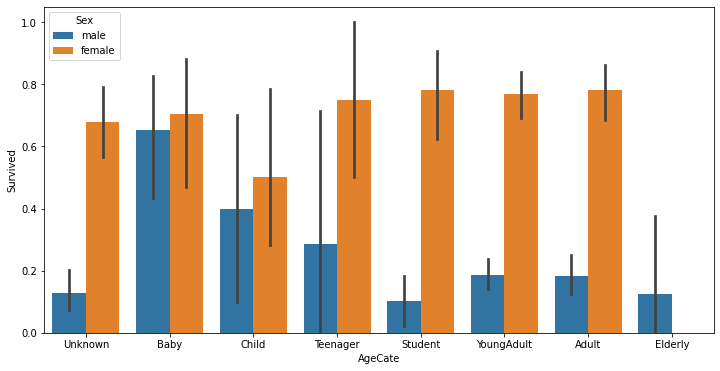

In [82]:
train = pd.concat([train, train_age_level], axis=1)

plt.figure(figsize=(12,6))

print(sns.barplot(x='AgeCate', y='Survived', hue = 'Sex', data = train, order = group_names))

In [83]:
train.drop('AgeCate', axis=1, inplace=True)
print (train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
